In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [46]:
#construct an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [47]:
#defining the sequential model for multiclass classification
model = keras.Sequential()

In [48]:
# Defining the CNN layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

In [49]:
#prepare iterators to loop through each and every image
training_iterator = train_datagen.flow_from_directory('dataset/flowers/train', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('dataset/flowers/test', batch_size=64, target_size=(100,100))


Found 3113 images belonging to 5 classes.
Found 1210 images belonging to 5 classes.


In [50]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator, validation_data = testing_iterator, epochs=8)

Epoch 1/8
49/49 [==============================] - 52s 1s/step - loss: 1.5967 - accuracy: 0.2951 - val_loss: 1.2273 - val_accuracy: 0.4884
Epoch 2/8
49/49 [==============================] - 54s 1s/step - loss: 1.2160 - accuracy: 0.4884 - val_loss: 1.0615 - val_accuracy: 0.5810
Epoch 3/8
49/49 [==============================] - 48s 990ms/step - loss: 1.0571 - accuracy: 0.5794 - val_loss: 0.9895 - val_accuracy: 0.6066
Epoch 4/8
49/49 [==============================] - 42s 853ms/step - loss: 1.0079 - accuracy: 0.5962 - val_loss: 0.9812 - val_accuracy: 0.6074
Epoch 5/8
49/49 [==============================] - 42s 851ms/step - loss: 0.9606 - accuracy: 0.6238 - val_loss: 0.9284 - val_accuracy: 0.6446
Epoch 6/8
49/49 [==============================] - 42s 853ms/step - loss: 0.9019 - accuracy: 0.6351 - val_loss: 0.8711 - val_accuracy: 0.6479
Epoch 7/8
49/49 [==============================] - 42s 851ms/step - loss: 0.8466 - accuracy: 0.6650 - val_loss: 0.8641 - val_accuracy: 0.6529
Epoch 8/8
49

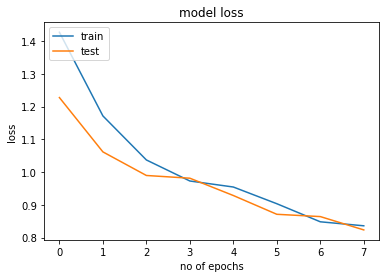

In [51]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

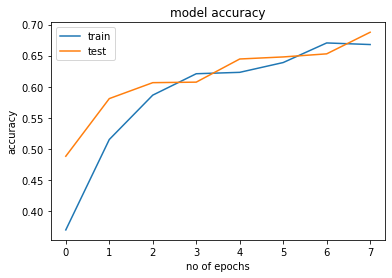

In [52]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [53]:
#get the class labels from iterator
class_labels = training_iterator.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [54]:
# {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}